In [2]:
import pandas as pd
import numpy as np


In [3]:
comments = pd.read_csv('Comments Corpus.csv')

In [7]:
comments.head()

,Unnamed: 0,0
0,0,Having to send your kids out there with no wea...
1,1,Respect ✊
2,2,I hope all the brave people finally win over t...
3,3,"If anybody here is reading this, my post at [h..."
4,4,Don't give up guys. Don't let Myanmar be anoth...


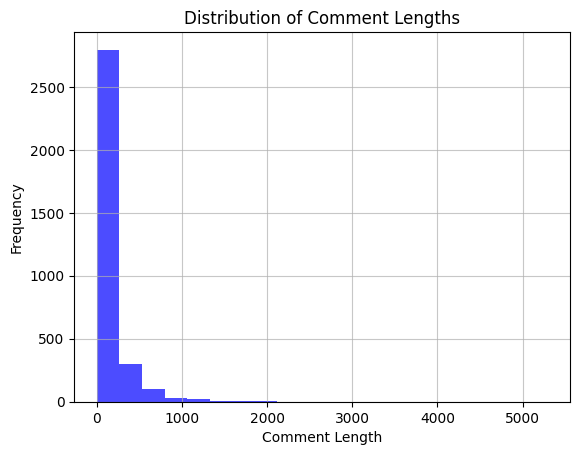

In [8]:
import matplotlib.pyplot as plt
comment_lengths = comments['0'].str.len()
plt.hist(comment_lengths, bins=20, color='blue', alpha=0.7)
plt.xlabel('Comment Length')
plt.ylabel('Frequency')
plt.title('Distribution of Comment Lengths')
plt.grid(axis='y', linestyle='-', alpha=0.7)
plt.grid(axis='x', linestyle='-', alpha=0.7)
plt.show()


In [9]:
def plot_word_length_histogram(text):
    word_lengths = text.str.split().apply(lambda x: [len(i) for i in x])
    mean_word_lengths = word_lengths.map(lambda x: np.mean(x))
    plt.hist(mean_word_lengths, bins=20, color='blue', alpha=0.7)
    plt.xlabel('Mean Word Length')
    plt.ylabel('Frequency')
    plt.title('Distribution of Mean Word Lengths')
    plt.grid(axis='y', linestyle='-', alpha=0.7)
    plt.grid(axis='x', linestyle='-', alpha=0.7)
    plt.show()

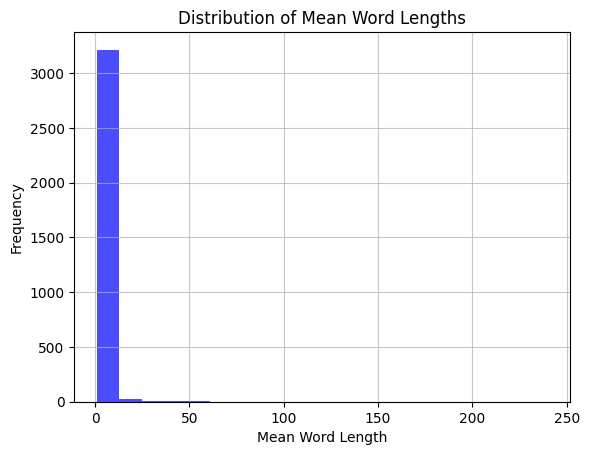

In [10]:
plot_word_length_histogram(comments['0'])

In [11]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to C:\Users\Maharshi
[nltk_data]     Anajwla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [12]:
stop = set(stopwords.words('english'))
from matplotlib import pyplot as plt

In [13]:
corpus = []
new = comments['0'].str.split()
new = new.values.tolist()
corpus= [word.lower() for i in new for word in i]

from collections import defaultdict
dic = defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

In [14]:
def plot_hist(dic):
    top = sorted(dic.items(), key = lambda x: x[1] , reverse = True)[:10]
    x , y = zip(*top)
    plt.bar(x , y)
    plt.ylabel('Frequency')
    plt.title('Top 10 most frequent stop-words')

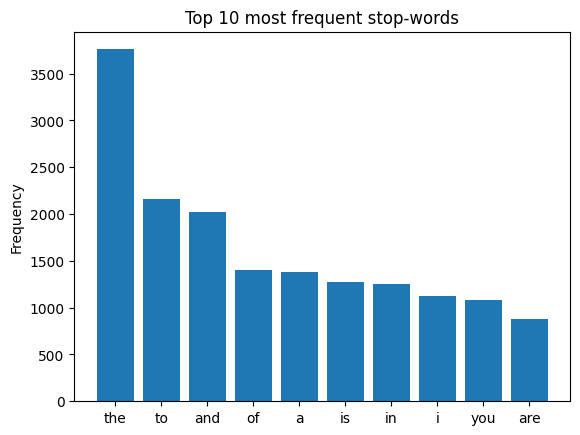

In [15]:
plot_hist(dic)

In [ ]:
%pip install Counter

Text(0.5, 1.0, 'Most Frequent Words after Removing Stop Words')

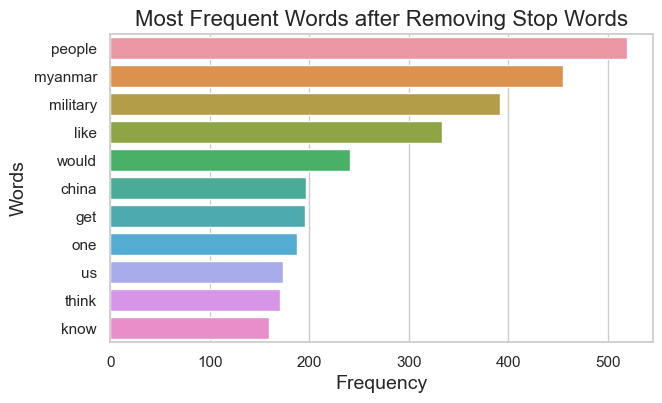

In [16]:
from collections import Counter
import seaborn as sns
counter = Counter(corpus)
most = counter.most_common()

x , y = [], []
for word, count in most[:65]:
    
    if(word not in stop):
        
        y.append(word)
        x.append(count)

# sns.barplot(x = x , y = y)
# plt.xlabel('Frequency')
# plt.title('most frequent words after removing stop words')

sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.barplot(x=x, y=y)
plt.xlabel('Frequency', fontsize=14)
plt.ylabel('Words', fontsize=14)
plt.title('Most Frequent Words after Removing Stop Words', fontsize=16)


In [17]:
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
def get_top_ngram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx])
                  for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:10]


Text(0.5, 1.0, 'Top bi-grams')

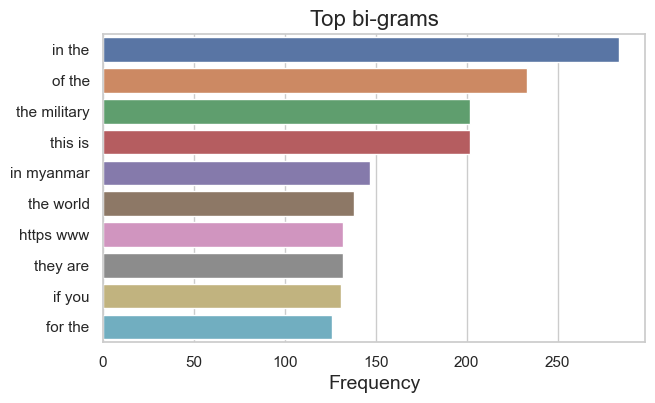

In [19]:
top_n_bigrams=get_top_ngram(comments['0'],2)[:10]
x,y = map(list,zip(*top_n_bigrams)) 
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.barplot(x=y, y=x)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top bi-grams', fontsize=16)

Text(0.5, 1.0, 'Top tri-grams')

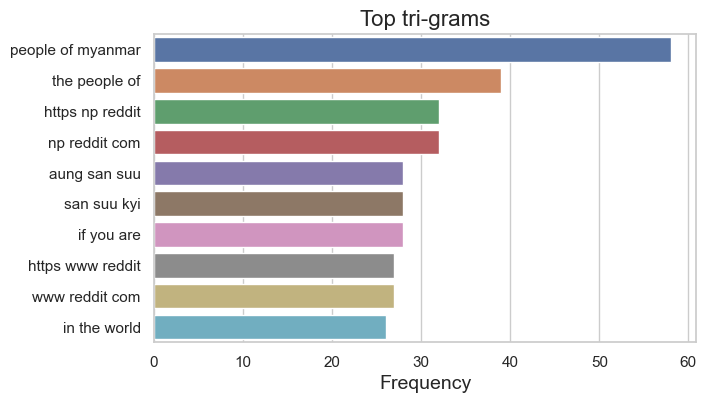

In [21]:
top_tri_grams = get_top_ngram(comments['0'] , n = 3)
y,x = map(list , zip(*top_tri_grams))
sns.set(style="whitegrid")
plt.figure(figsize=(7, 4))
sns.barplot(x=x, y=y)
plt.xlabel('Frequency', fontsize=14)
plt.title('Top tri-grams', fontsize=16)

In [ ]:
nltk.download('punkt')
nltk.download('wordnet')

In [22]:
from nltk.stem.porter import *
from nltk.stem.wordnet import *
from nltk.tokenize import word_tokenize

def preprocess(df):
    
    corpus = []
    stem = PorterStemmer()
    lem = WordNetLemmatizer()
    
    for comment in df['0']:
        
        words = [w for w in word_tokenize(comment) if (w not in stop)]
        words = [lem.lemmatize(w) for w in words if (len(w) > 2)]
        corpus.append(words)
        
    return corpus

In [23]:
corpus = preprocess(comments)

In [24]:
import gensim
dic = gensim.corpora.Dictionary(corpus)
bow_corpus = [dic.doc2bow(comm) for comm in corpus]

In [25]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.017*"Myanmar" + 0.016*"people" + 0.014*"n\'t" + 0.010*"military" + 0.009*"The" + 0.008*"http" + 0.007*"country" + 0.007*"like" + 0.007*"help" + 0.005*"know"'),
 (1,
  '0.010*"people" + 0.007*"military" + 0.006*"country" + 0.006*"Myanmar" + 0.006*"The" + 0.006*"removed" + 0.005*"one" + 0.005*"like" + 0.004*"China" + 0.004*"would"'),
 (2,
  '0.008*"Myanmar" + 0.007*"would" + 0.007*"The" + 0.006*"They" + 0.006*"people" + 0.006*"n\'t" + 0.005*"http" + 0.005*"China" + 0.005*"one" + 0.005*"You"'),
 (3,
  '0.009*"like" + 0.008*"people" + 0.007*"military" + 0.007*"This" + 0.006*"Myanmar" + 0.006*"You" + 0.005*"get" + 0.005*"world" + 0.004*"n\'t" + 0.004*"What"')]

In [26]:
import pyLDAvis.gensim
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.044240 -0.020925       1        1  41.896810
2     -0.014172 -0.074743       2        1  23.162952
3     -0.050885  0.077668       3        1  20.942004
1      0.109297  0.017999       4        1  13.998233, topic_info=         Term        Freq       Total Category  logprob  loglift
76    removed   44.000000   44.000000  Default  30.0000  30.0000
1419  deleted   66.000000   66.000000  Default  29.0000  29.0000
49       http  238.000000  238.000000  Default  28.0000  28.0000
1076    peace   40.000000   40.000000  Default  27.0000  27.0000
637      safe   43.000000   43.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
345       ...   13.691596  115.011309   Topic4  -6.1537  -0.1620
252     could   13.027492   91.334971   Topic4  -6.2034   0.0188
66        n't   16.121453  382.786266   Topic4  -5.9903  -1.2011
541     thing   12.651080   96.668813   Topic4  -6.2327  -0.0673
97       They   12.349548  193.159688   Topic4  -6.2569  -0.7837

[334 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
934       1  0.352760   're
934       2  0.231499   're
934       3  0.319689   're
934       4  0.088190   're
345       1  0.556467   ...
...     ...       ...   ...
1862      4  0.798487   미얀마
1863      4  0.890270  미얀마의
1884      4  0.798485   비폭력
1950      4  0.798473  있습니다
1980      4  0.890216  주십시요

[623 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 4, 2])

In [ ]:
from wordcloud import WordCloud, STOPWORDS

In [ ]:
corpus

In [ ]:
!python3 -m spacy download en_core_web_sm

In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')

In [ ]:
doc = nlp("Diu was liberated from Portuguese rule by the Indian government in 1961")

In [ ]:
[(x.text , x.label_) for x in doc.ents]

In [ ]:
from spacy import displacy
displacy.render(doc , style = "ent")

In [ ]:
def ner(text):
    
    doc = nlp(text)
    return [x.label_ for x in doc.ents]

In [ ]:
ent = comments['0'].apply(lambda x: ner(x))


In [ ]:
ner_map = {}
for sub in ent:
    for ner_type in sub:
        if(ner_type not in ner_map): ner_map[ner_type] = 0
        ner_map[ner_type]+= 1
ner_map = sorted(ner_map.items() , key = lambda x: x[1] , reverse = True)[:10]

In [ ]:
ner_map

In [ ]:
y , x = map(list , zip(*ner_map))
sns.barplot(x = x , y = y)

In [ ]:
def get_top_ner(text , ent):
    doc = nlp(text)
    return [x.text for x in doc.ents if x.label_ == ent]

In [ ]:
gpe = comments['0'].apply(lambda x: get_top_ner(x , "GPE"))

In [ ]:
gpe_map = {}
for sub in gpe:
    for name in sub:
        if(name not in gpe_map): gpe_map[name] = 0
        gpe_map[name]+= 1
gpe_map = sorted(gpe_map.items() , key = lambda x: x[1] , reverse = True)[:10]

In [ ]:
y , x = map(list , zip(*gpe_map))

In [ ]:
sns.barplot(x = x , y = y)